In [2]:
import numpy as np

n1, n2, n3, n4, n5 = 8, 2, 2, 63, 2
mtx_names = np.empty((n2, n3, n4, n5), dtype="U10")
for k2 in range(n2):
    for k3 in range(n3):
        for k4 in range(n4):
            for k5 in range(n5):
                mtx_names[k2, k3, k4, k5] = str(k2).zfill(2) + str(k3).zfill(2) + str(k4).zfill(2) + str(k5).zfill(2)
mtx_names = mtx_names.flatten()

Holmes-Coshocton-Guernsey

In [9]:
import pandas as pd

# prepare pums
filename_pums = 'data/guernsey/guernsey_pums10.csv'
pums = pd.read_csv(filename_pums)           
pums_mtx = []
for col in mtx_names:
    va, e, r, s = int(col[0:2]) + 1, int(col[2:4]) + 1, int(col[4:6]) + 1, int(col[6:8]) + 1
    val = len(pums[(pums['AGEP'] == va) & (pums['HISP'] == e) & (pums['RAC1P'] == r) & (pums['SEX'] == s)])
    pums_mtx.append(val)
pums_mtx = np.array(pums_mtx)
pums_mtx

array([ 852,  783,    4,    6,    0,    0,    2,    3,    0,    0,    4,
          3,   25,   28,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    6,    6,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    2,    6,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

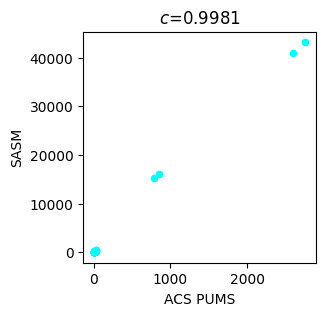

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# oh_data = oh_data[(oh_data['COUNTYA'] == 39075) | (oh_data['COUNTYA'] == 39031) | (oh_data['COUNTYA'] == 39059)]
filename_data = 'data/guernsey/holmes_coshocton_guernsey_microdata.csv'
hcg_data = pd.read_csv(filename_data)

# AGE
hcg_data.loc[hcg_data["AGE"] == 1, "AGE"] = 1
hcg_data.loc[hcg_data["AGE"] > 1, "AGE"] = 2
             
sasm_mtx = []
for col in mtx_names:
    va, e, r, s = int(col[0:2]) + 1, int(col[2:4]) + 1, int(col[4:6]) + 1, int(col[6:8]) + 1
    val = len(hcg_data[(hcg_data['AGE'] == va) & (hcg_data['ETHN'] == e) & (hcg_data['RACE'] == r) & (hcg_data['SEX'] == s)])
    sasm_mtx.append(val)
sasm_mtx = np.array(sasm_mtx)

c = round(np.dot(sasm_mtx, pums_mtx)/(norm(sasm_mtx) * norm(pums_mtx)), 4)
df = pd.DataFrame({"pums": pums_mtx})
df["fit"] = sasm_mtx

plt.rcParams["figure.figsize"] = (3,3)
ax = df.plot.scatter(x="pums", y="fit",c='cyan')
ax.set_xlabel("ACS PUMS")
ax.set_ylabel("SASM")
ax.set(title="$c$=" + str(c))
ax.get_figure().savefig('figs/guernsey_ext_val2.svg')

Franklin

In [11]:
import pandas as pd
import numpy as np

n1, n2, n3, n4, n5 = 8, 2, 2, 63, 2
filename_pums = 'data/franklin/franklin_pums10.csv'

# prepare pums
pums = pd.read_csv(filename_pums)
pumaids = [*set(pums['PUMA'].to_list())]
pumaids.sort()

df = pums.groupby(['PUMA', 'AGEP', 'HISP', 'RAC1P', 'SEX']).size()
pums_mtx = pd.DataFrame(0, index=range(len(pumaids)), columns=[mtx_names])
pums_mtx.index = pumaids
for idx, item in df.items():
    pumaid = idx[0]
    name = str(idx[1]-1).zfill(2) + str(idx[2]-1).zfill(2) + str(idx[3]-1).zfill(2) + str(idx[4]-1).zfill(2)
    pums_mtx.at[pumaid, name] = int(item)

pums_mtx

,00000000,00000001,00000100,00000101,00000200,00000201,00000300,00000301,00000400,00000401,...,01015800,01015801,01015900,01015901,01016000,01016001,01016100,01016101,01016200,01016201
4101,342,321,57,59,2,0,34,21,0,0,...,0,0,0,0,0,0,0,0,0,0
4102,374,401,89,68,0,0,12,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4103,424,363,21,17,0,3,69,66,0,0,...,0,0,0,0,0,0,0,0,0,0
4104,442,425,16,11,0,0,28,32,0,0,...,0,0,0,0,0,0,0,0,0,0
4105,173,158,21,35,0,2,4,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4106,191,157,357,351,0,0,31,29,0,0,...,0,0,0,0,0,0,0,0,0,0
4107,209,224,292,308,1,0,6,4,1,1,...,0,0,0,0,0,0,0,0,0,0
4108,149,118,202,194,0,0,13,10,2,1,...,0,0,0,0,0,0,0,0,0,0
4109,392,352,86,67,0,2,8,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4110,273,275,107,85,0,0,15,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# prepare synthetic data
filename_data = 'data/franklin_microdata.csv'
fra_data = pd.read_csv(filename_data)

# RACE
fra_data.loc[fra_data["R"] > 7, "R"] = 7
             
blkids = [*set(fra_data['Block'].to_list())]
blkids.sort()

df = fra_data.groupby(['Block', 'VA', 'E', 'R', 'S']).size()
sasm_mtx = pd.DataFrame(0, index=range(len(blkids)), columns=[mtx_names])
sasm_mtx.index = blkids
for idx, item in df.items():
    blkid = idx[0]
    name = str(idx[1]-1).zfill(2) + str(idx[2]-1).zfill(2) + str(idx[3]-1).zfill(2) + str(idx[4]-1).zfill(2)
    sasm_mtx.at[blkid, name] = int(item)

sasm_mtx

,00000000,00000001,00000100,00000101,00000200,00000201,00000300,00000301,00000400,00000401,...,01015800,01015801,01015900,01015901,01016000,01016001,01016100,01016101,01016200,01016201
390490001101001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490001101002,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490001101003,8,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490001101004,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490001101005,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390490107001015,5,8,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490107001016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390490107001017,3,2,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
390490107001020,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import pandas as pd

filename_join = 'data/franklin/franklin_puma_blk.csv'
df_join = pd.read_csv(filename_join)
df_join = df_join[["GEOID10", "PUMACE10"]]
df_join["GEOID10"] = df_join["GEOID10"].astype('int64')
df_join = df_join.set_index("GEOID10")
idx = [i for i in df_join.index if i not in sasm_mtx.index]
df_join = df_join.drop(idx)
df_join.index.name = None
 
hist_new = pd.merge(df_join, sasm_mtx, left_index=True, right_index=True)
hist_new = hist_new.groupby('PUMACE10').sum()
hist_new.index.name = None
hist_new

,"(00000000,)","(00000001,)","(00000100,)","(00000101,)","(00000200,)","(00000201,)","(00000300,)","(00000301,)","(00000400,)","(00000401,)",...,"(01015800,)","(01015801,)","(01015900,)","(01015901,)","(01016000,)","(01016001,)","(01016100,)","(01016101,)","(01016200,)","(01016201,)"
4101,9047,9073,2235,2299,15,18,598,617,1,10,...,0,0,0,0,0,0,0,0,0,0
4102,6850,6912,2673,2763,15,14,246,288,6,5,...,0,0,0,0,0,0,0,0,0,0
4103,9934,9889,626,615,30,20,1736,1693,4,7,...,0,0,0,0,0,0,0,0,0,0
4104,7777,7906,379,329,13,21,731,660,2,0,...,0,0,0,0,0,0,0,0,0,0
4105,2821,2832,684,632,7,8,141,164,0,0,...,0,0,0,0,0,0,0,0,0,0
4106,4035,4078,9680,9835,32,32,261,252,16,18,...,0,0,0,0,0,0,0,0,0,0
4107,3705,3746,7353,7118,31,28,117,148,21,16,...,0,0,0,0,0,0,0,0,0,0
4108,4664,4852,7123,7325,25,19,157,180,9,18,...,0,0,0,0,0,0,0,0,0,0
4109,10022,10171,2490,2431,21,26,194,210,28,29,...,0,0,0,0,0,0,0,0,0,0
4110,8182,8529,2951,3030,34,29,310,290,22,37,...,0,0,0,0,0,0,0,0,0,0


0.9980475634968881
0.9961903630217742
0.9993089607932412
0.9997677813325103
0.9986533939912786
0.986996714847419
0.9857870294301826
0.9961299078433485
0.9981975360568509
0.9960528225599582
0.9977648060522876


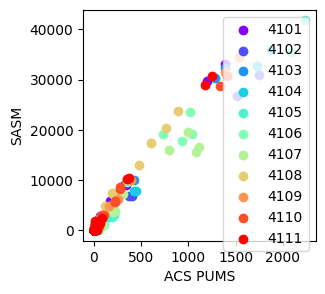

In [14]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

A = pums_mtx.to_numpy()
B = hist_new.to_numpy()
cos = np.sum(A*B, axis=1)/(norm(A, axis=1)*norm(B, axis=1))

colors = cm.rainbow(np.linspace(0, 1, 11))
for i, c in zip(range(11), colors):
    plt.scatter(A[i], B[i], color=c, label=hist_new.index[i])
    print(cos[i])
    
plt.rcParams["figure.figsize"] = (3,3)
plt.xlabel("ACS PUMS")
plt.ylabel("SASM")
plt.legend()

plt.savefig('figs/franklin_ext_val.svg')

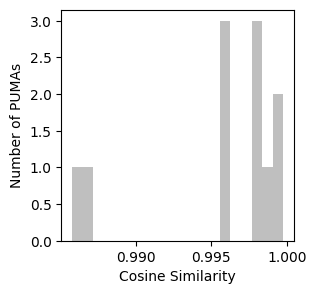

In [15]:
plt.hist(cos, 20, alpha=0.5, color='grey')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of PUMAs')
plt.savefig('figs/franklin_ext_val2.svg')